In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [3]:
Y_train = train["label"]


X_train = train.drop(columns="label",axis = 1)


del train

Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [4]:
X_train.isna().sum().any()

False

In [5]:
test.isna().sum().any()

False

In [6]:
X_train=X_train/255.0
test=test/255.0

In [7]:
X_train.shape

(42000, 784)

In [8]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [9]:
X_train.shape
test.shape

(28000, 28, 28, 1)

In [10]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)

In [11]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

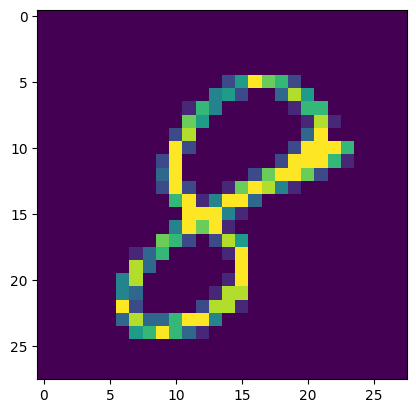

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,GlobalAvgPool2D,GlobalMaxPooling2D
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu",
                 kernel_initializer="uniform",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,activation="relu",padding="Same",kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [17]:
model.compile(optimizer="adam",metrics=["CategoricalAccuracy","accuracy"],loss="categorical_crossentropy")

In [18]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
earlyStopping=EarlyStopping(monitor="val_loss",patience=7,verbose=1,mode="min")

reduceLROnPlateau=ReduceLROnPlateau(monitor="val_accuracy",patience=8,factor=0.2,min_lr=0.0001)

modelCheckpoint=ModelCheckpoint("best_model_cnn.keras",mode="max",monitor="val_accuracy",save_best_only=True)

In [19]:
#augmantation

In [20]:
training_model=model.fit(X_train,Y_train,epochs=150,batch_size=128,validation_split=0.2,
                         callbacks=[earlyStopping,modelCheckpoint,reduceLROnPlateau]
                         )

Epoch 1/150
237/237 [==============================] - 63s 225ms/step - loss: 0.2948 - categorical_accuracy: 0.9074 - accuracy: 0.9074 - val_loss: 0.0734 - val_categorical_accuracy: 0.9775 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 2/150
237/237 [==============================] - 51s 216ms/step - loss: 0.0827 - categorical_accuracy: 0.9739 - accuracy: 0.9739 - val_loss: 0.0552 - val_categorical_accuracy: 0.9832 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 3/150
237/237 [==============================] - 52s 218ms/step - loss: 0.0552 - categorical_accuracy: 0.9830 - accuracy: 0.9830 - val_loss: 0.0393 - val_categorical_accuracy: 0.9888 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 4/150
237/237 [==============================] - 49s 207ms/step - loss: 0.0454 - categorical_accuracy: 0.9854 - accuracy: 0.9854 - val_loss: 0.0336 - val_categorical_accuracy: 0.9890 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/150
237/237 [==============================] - 52s 221ms/step - loss: 0.0352 - categorical_a

Text(0.5, 1.0, 'training loss')

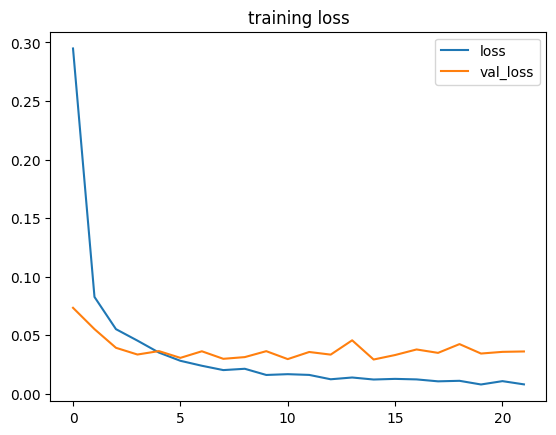

In [21]:
plt.plot(training_model.history["loss"],label="loss")
plt.plot(training_model.history["val_loss"],label="val_loss")
plt.legend()
plt.title("training loss")

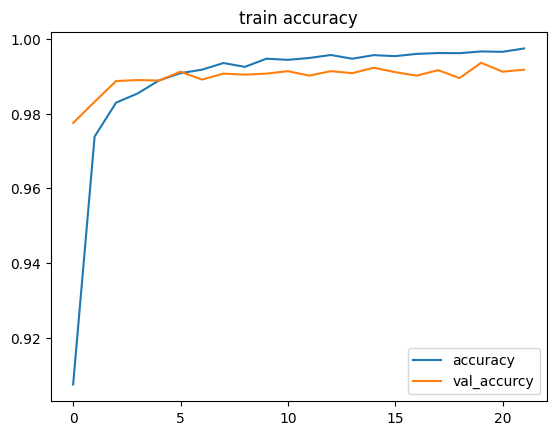

In [22]:
plt.plot(training_model.history["accuracy"],label="accuracy")
plt.plot(training_model.history["val_accuracy"],label="val_accurcy")
plt.title("train accuracy")
plt.legend()

In [24]:
from keras.models import load_model
best_model=load_model("best_model_cnn.keras")

132/132 [==============================] - 2s 14ms/step


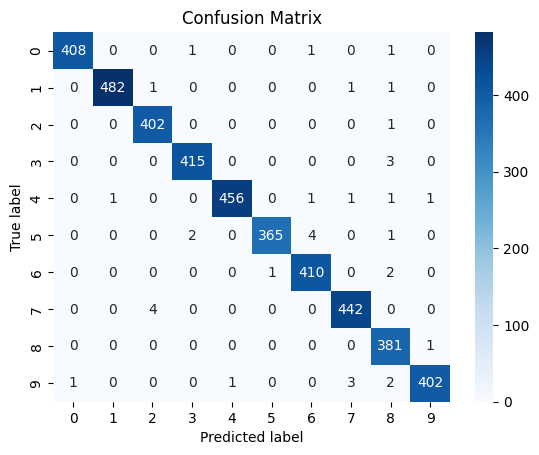

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred=best_model.predict(X_val)
y_pred_class=np.argmax(y_pred,axis=1)
y_true=np.argmax(Y_val,axis=1)
cm=confusion_matrix(y_true,y_pred_class)
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=range(10),yticklabels=range(10),fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [27]:
from sklearn.metrics import classification_report
print(f"classification_report \n {classification_report(y_true,y_pred_class,digits=4)}")

classification_report 
               precision    recall  f1-score   support

           0     0.9976    0.9927    0.9951       411
           1     0.9979    0.9938    0.9959       485
           2     0.9877    0.9975    0.9926       403
           3     0.9928    0.9928    0.9928       418
           4     0.9978    0.9892    0.9935       461
           5     0.9973    0.9812    0.9892       372
           6     0.9856    0.9927    0.9891       413
           7     0.9888    0.9910    0.9899       446
           8     0.9695    0.9974    0.9832       382
           9     0.9950    0.9829    0.9889       409

    accuracy                         0.9912      4200
   macro avg     0.9910    0.9911    0.9910      4200
weighted avg     0.9913    0.9912    0.9912      4200



predict : 2
 True :7


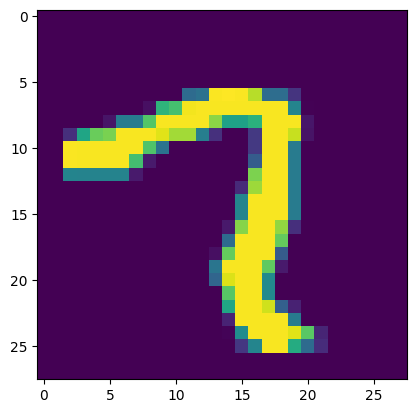

predict : 7
 True :9


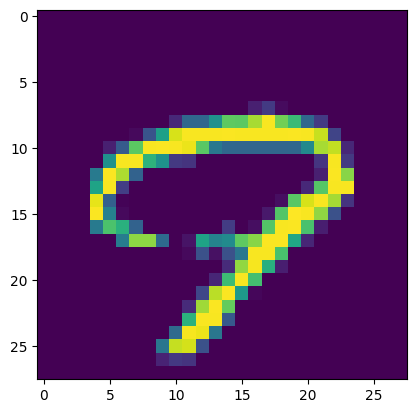

predict : 7
 True :9


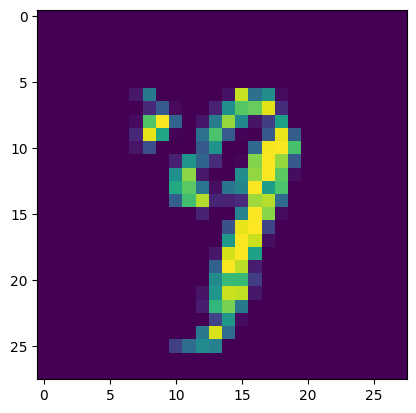

predict : 9
 True :8


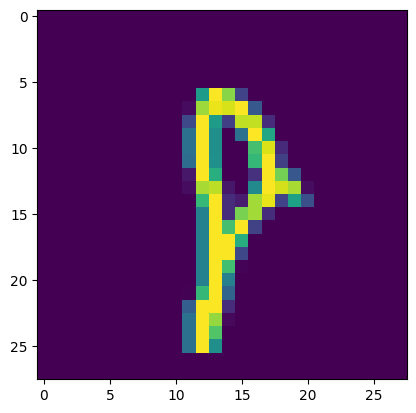

predict : 8
 True :5


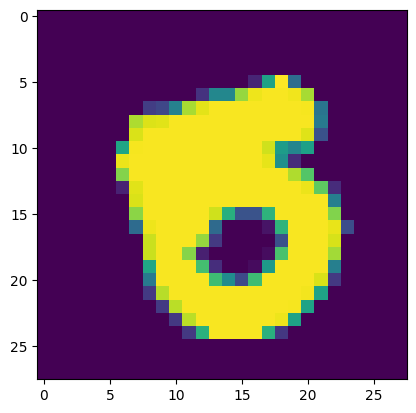

In [29]:
errors=(y_pred_class != y_true)
y_pred_class_erorr=y_pred_class[errors]
y_true_error=y_true[errors]
X_val_error=X_val[errors]
for i in range(5):
    print(f"predict : {y_pred_class_erorr[i]}")
    print(f" True :{y_true_error[i]}")
    plt.imshow(X_val_error[i])
    plt.show()


In [30]:
final_test=best_model.predict(test)
final_test=np.argmax(final_test,axis=1)
final_test=pd.Series(final_test,name="label")


875/875 [==============================] - 12s 14ms/step


In [31]:
result=pd.concat([pd.Series(range(1,28001),name="ImageId"),final_test],axis=1)
result.to_csv("cnn_mnist_datagen2.csv",index=False)